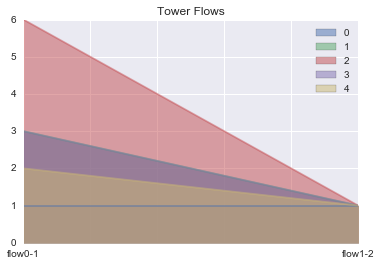

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# This line lets us plot on our ipython notebook
%matplotlib inline

df_01=pd.read_csv("data/Hourly Flows/Rn_OD_0-1.txt", header=None, names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow'])
df_12=pd.read_csv("data/Hourly Flows/Rn_OD_1-2.txt", header=None, names=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow'])
combined_flow = df_01.join(df_12['flow'], lsuffix='0-1', rsuffix='1-2')
combined_flow[:5][['flow0-1', 'flow1-2']].transpose().plot(kind='area', stacked=False, 
                                                            legend=True, title='Tower Flows')


In [6]:
# Add your code below:
#define 3 variables
merge_cname="flow"
filepath="data/Hourly Flows/Rn_OD_0-1.txt"
list_cnames=['oid', 'did', 'close_rid_origin', 'close_rid_dest', 'flow']
#self-defined function that can join all flows into one single dataframe
def df_merge_24(filepath,merge_cname,list_cnames):
    dict_df_024={}
    #use a for loop to read all the files and put them into a dictionary for further use
    for i in range(24):
        filepath=filepath[:24]+str(i)+"-"+str(i+1)+".txt"
        dict_df_024["df_"+str(i)+str(i+1)]=pd.read_csv(filepath, header=None, names=list_cnames)
    #give a initial DataFrame object to start join. 
    #use the key from the first for loop created
    df_final=dict_df_024['df_01']
    #use join function in pandas to join columns in, notice that lsuffix only functions in the first join operation
    for j in range(1, 24):
        df_final=df_final.join(dict_df_024["df_"+str(j)+str(j+1)][merge_cname], lsuffix=str(j-1)+'-'+str(j), rsuffix=str(j)+'-'+str(j+1))
    return df_final

df_merge_24(filepath,merge_cname,list_cnames)[:20]

,oid,did,close_rid_origin,close_rid_dest,flow0-1,flow1-2,flow2-3,flow3-4,flow4-5,flow5-6,...,flow14-15,flow15-16,flow16-17,flow17-18,flow18-19,flow19-20,flow20-21,flow21-22,flow22-23,flow23-24
0,1,2,20404,16208,1,1,1,1,1,1,...,1,2,2,1,2,1,1,25,1,6
1,1,20,20404,11056,3,1,1,1,1,1,...,1,2,1,1,1,2,20,2,1,1
2,1,38,20404,18943,6,1,1,1,1,4,...,1,1,3,2,1,1,4,1,21,7
3,1,42,20404,18961,3,1,1,1,1,2,...,1,1,1,4,21,8,1,2,9,1
4,1,60,20404,18942,2,1,1,1,1,1,...,26,3,1,2,2,1,1,1,1,6
5,1,73,20404,18940,2,1,1,1,1,1,...,4,16,4,1,1,4,25,17,6,4
6,1,105,20404,17765,1,1,2,1,1,1,...,2,4,32,2,38,1,2,11,1,1
7,1,146,20404,17594,1,1,1,1,1,1,...,1,2,1,25,16,14,7,1,1,2
8,1,201,20404,11322,1,1,1,1,1,1,...,30,1,5,7,1,4,1,1,2,1
9,1,230,20404,18892,1,2,1,1,1,1,...,1,2,2,3,2,12,13,5,1,1


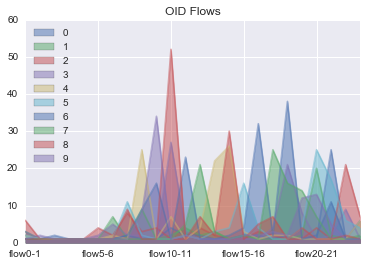

In [7]:
combined_flow=df_merge_24(filepath,merge_cname,list_cnames)
list_hour_keys=[]
for k in range(24):
    list_hour_keys.append("flow"+str(k)+'-'+str(k+1))

combined_flow[:10][list_hour_keys].transpose().plot(kind='area', stacked=False, 
                                                            legend=True, title='OID Flows')

In [8]:
lista=[]
for i in range(24):
    lista.append("df_"+str(i)+str(i+1))
print lista

['df_01', 'df_12', 'df_23', 'df_34', 'df_45', 'df_56', 'df_67', 'df_78', 'df_89', 'df_910', 'df_1011', 'df_1112', 'df_1213', 'df_1314', 'df_1415', 'df_1516', 'df_1617', 'df_1718', 'df_1819', 'df_1920', 'df_2021', 'df_2122', 'df_2223', 'df_2324']


In [9]:
 df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'], 'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
'C' : np.random.randn(8), 'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.408901,0.832785
1,bar,one,-1.491129,1.145509
2,foo,two,0.796220,-1.333905
3,bar,three,1.890899,-1.820808
4,foo,two,-0.159399,1.076822
5,bar,two,1.050973,-0.819853
6,foo,one,1.918575,-2.299645
7,foo,three,-0.884620,0.939144


In [10]:
grouped = df.groupby('A')
print grouped
grouped.aggregate(np.sum)


,C,D
A,,
bar,1.450743,-1.495153
foo,1.261875,-0.784800


In [11]:
edges=df_merge_24(filepath,merge_cname,list_cnames)
edges.head()


,oid,did,close_rid_origin,close_rid_dest,flow0-1,flow1-2,flow2-3,flow3-4,flow4-5,flow5-6,...,flow14-15,flow15-16,flow16-17,flow17-18,flow18-19,flow19-20,flow20-21,flow21-22,flow22-23,flow23-24
0,1,2,20404,16208,1,1,1,1,1,1,...,1,2,2,1,2,1,1,25,1,6
1,1,20,20404,11056,3,1,1,1,1,1,...,1,2,1,1,1,2,20,2,1,1
2,1,38,20404,18943,6,1,1,1,1,4,...,1,1,3,2,1,1,4,1,21,7
3,1,42,20404,18961,3,1,1,1,1,2,...,1,1,1,4,21,8,1,2,9,1
4,1,60,20404,18942,2,1,1,1,1,1,...,26,3,1,2,2,1,1,1,1,6


In [32]:
dict_four_values={}
for i in range(24): 
    dict_four_values["flow"+str(i)+'-'+str(i+1)]=[np.mean(edges['flow'+str(i)+'-'+str(i+1)]), np.max(edges['flow'+str(i)+'-'+str(i+1)]), 
                                                  np.min(edges['flow'+str(i)+'-'+str(i+1)]), np.median(edges['flow'+str(i)+'-'+str(i+1)])]
dict_four_values
df_four_values=pd.DataFrame(dict_four_values, index = ['mean','max','min','median'])
df_four_values

,flow0-1,flow1-2,flow10-11,flow11-12,flow12-13,flow13-14,flow14-15,flow15-16,flow16-17,flow17-18,...,flow21-22,flow22-23,flow23-24,flow3-4,flow4-5,flow5-6,flow6-7,flow7-8,flow8-9,flow9-10
mean,1.18279,1.141836,1.513197,1.561666,1.529533,1.503925,1.460361,1.54685,1.680975,1.658114,...,1.521733,1.423911,1.276295,1.111675,1.107216,1.098979,1.156986,1.209821,1.31196,1.414688
max,47.00000,19.000000,61.000000,64.000000,89.000000,100.000000,130.000000,147.00000,171.000000,169.000000,...,203.000000,163.000000,81.000000,7.000000,12.000000,22.000000,21.000000,28.000000,49.00000,48.000000
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
median,1.00000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.00000,1.000000


In [55]:
dict_four_values={}
for i in range(24): 
    dict_four_values["flow"+str(i)+'-'+str(i+1)]=[np.mean(edges['flow'+str(i)+'-'+str(i+1)]), np.max(edges['flow'+str(i)+'-'+str(i+1)]), 
                                                  np.min(edges['flow'+str(i)+'-'+str(i+1)]), np.median(edges['flow'+str(i)+'-'+str(i+1)])]
ordered_df=pd.DataFrame({'flow0-1':dict_four_values['flow0-1']})
ordered_df

for j in range(1,24):
    ordered_df=ordered_df.join(pd.DataFrame({'flow'+str(j)+'-'+str(j+1):dict_four_values['flow'+str(j)+'-'+str(j+1)]}))
ordered_df.index=['mean','max','min','median']
ordered_df

,flow0-1,flow1-2,flow2-3,flow3-4,flow4-5,flow5-6,flow6-7,flow7-8,flow8-9,flow9-10,...,flow14-15,flow15-16,flow16-17,flow17-18,flow18-19,flow19-20,flow20-21,flow21-22,flow22-23,flow23-24
mean,1.18279,1.141836,1.112856,1.111675,1.107216,1.098979,1.156986,1.209821,1.31196,1.414688,...,1.460361,1.54685,1.680975,1.658114,1.661499,1.633634,1.611068,1.521733,1.423911,1.276295
max,47.00000,19.000000,12.000000,7.000000,12.000000,22.000000,21.000000,28.000000,49.00000,48.000000,...,130.000000,147.00000,171.000000,169.000000,221.000000,254.000000,243.000000,203.000000,163.000000,81.000000
min,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,1.00000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


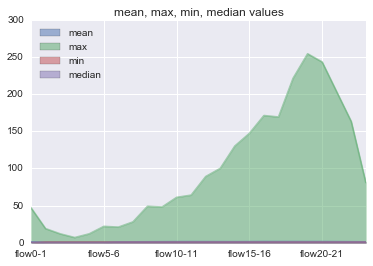

In [56]:


ordered_df[list_hour_keys].transpose().plot(kind='area', stacked=False, 
                                                            legend=True, title='mean, max, min, median values')